In [1]:
import pandas as pd 
from sqlalchemy import create_engine
import psycopg2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np

In [2]:
username = "postgres"
password = "rafia123"
host  = "localhost"
port  = "5432"
database = "e_commerce"

engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

tables = ["customers", "geolocation", "orders", "order_item", "order_payments", "order_reviews", "products", "sellers", "product_category_name_translation", "customer_order_payments"]

dfs = {t: pd.read_sql_table(t, engine) for t in tables}
print("All tables imported in python successfully")

All tables imported in python successfully


In [61]:
dfs["customers"].head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


In [62]:
dfs["customers"].isnull().sum()


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [63]:
dfs["customers"].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99436    False
99437    False
99438    False
99439    False
99440    False
Length: 99441, dtype: bool

In [64]:
dfs["customers"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [65]:

dfs["geolocation"].head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


In [66]:
dfs["geolocation"].isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [67]:
dfs["geolocation"].duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1000158    False
1000159     True
1000160     True
1000161    False
1000162     True
Length: 1000163, dtype: bool

In [68]:
dfs["geolocation"].tail(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS
1000162,99950,-28.070104,-52.018658,tapejara,RS


In [69]:
dfs["orders"].head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,None,None,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [70]:
dfs["orders"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [71]:
dfs["orders"].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99436    False
99437    False
99438    False
99439    False
99440    False
Length: 99441, dtype: bool

In [72]:
dfs["order_item"].head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [73]:
dfs["order_item"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [74]:
dfs["order_item"].duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
112645    False
112646    False
112647    False
112648    False
112649    False
Length: 112650, dtype: bool

In [75]:
dfs["order_payments"].head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


In [76]:
dfs["order_payments"].tail(20)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
103866,387c2c33e495538e94878a500bf8e6d5,1,credit_card,1,87.58
103867,d5639d8a973cec351be75a3186835068,1,boleto,1,160.89
103868,0020262c8a370bd5a174ea6a2a267321,1,credit_card,2,100.55
103869,c9b01bef18eb84888f0fd071b8413b38,1,credit_card,6,238.16
103870,9ac048d7ffebba67d54456aa9ec07d7e,1,credit_card,1,60.69
103871,20824837882dd673707e0adfcaec1bc1,1,credit_card,1,84.23
103872,38d11c87fc409de31e930084abb0c7a4,1,credit_card,7,91.03
103873,40ec2cf5cb1eb0bf1ea2b117552fecb5,1,credit_card,2,90.28
103874,d41f1036712e18ee525939d08b7a1c98,1,credit_card,1,3.57
103875,60aed0a4eba0e424eb3cac85017fd752,1,credit_card,10,170.14


In [77]:
dfs["order_payments"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [78]:
dfs["order_payments"].columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [79]:
dfs["order_payments"].duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
103881    False
103882    False
103883    False
103884    False
103885    False
Length: 103886, dtype: bool

In [80]:
dfs["order_reviews"].head(10)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,None,None,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,None,None,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,None,None,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,None,None,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


In [81]:
dfs["order_reviews"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [82]:
dfs["order_reviews"].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99219    False
99220    False
99221    False
99222    False
99223    False
Length: 99224, dtype: bool

In [83]:
dfs["products"].head(20)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


In [84]:
dfs["products"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [85]:
dfs["products"].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32946    False
32947    False
32948    False
32949    False
32950    False
Length: 32951, dtype: bool

In [86]:
dfs["sellers"].head(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR


In [87]:
dfs["sellers"].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [88]:
dfs["sellers"].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3090    False
3091    False
3092    False
3093    False
3094    False
Length: 3095, dtype: bool

In [89]:
dfs["product_category_name_translation"].head(10)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


In [90]:
dfs["product_category_name_translation"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [91]:
dfs["product_category_name_translation"].duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
66    False
67    False
68    False
69    False
70    False
Length: 71, dtype: bool

In [92]:
pd.set_option('display.max_columns', None)

In [41]:
dfs["customer_order_payments"].head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,...,review_id,review_score,review_creation_date,product_category_name_pt,product_weight_g,seller_zip_code_prefix,seller_city,seller_state,product_category_name_original,product_category_name_english
0,0b8eb01b2a378b535126bdf817eb1761,ad7e2fa70d0db12bce950350ebc0e242,13177,sumare,SP,02e0c2efb6d9bb2a95ca90b7e78bec1f,delivered,2018-04-01 10:50:46,2018-04-09 18:48:28,credit_card,...,6d8f99d23b8ef3200ef680aa27403bf8,1.0,2018-04-10 00:00:00,cama_mesa_banho,800.0,14940.0,ibitinga,SP,cama_mesa_banho,bed_bath_table
1,0b8eb01b2a378b535126bdf817eb1761,ad7e2fa70d0db12bce950350ebc0e242,13177,sumare,SP,02e0c2efb6d9bb2a95ca90b7e78bec1f,delivered,2018-04-01 10:50:46,2018-04-09 18:48:28,credit_card,...,6d8f99d23b8ef3200ef680aa27403bf8,1.0,2018-04-10 00:00:00,cama_mesa_banho,800.0,14940.0,ibitinga,SP,cama_mesa_banho,bed_bath_table
2,0b8eb01b2a378b535126bdf817eb1761,ad7e2fa70d0db12bce950350ebc0e242,13177,sumare,SP,02e0c2efb6d9bb2a95ca90b7e78bec1f,delivered,2018-04-01 10:50:46,2018-04-09 18:48:28,credit_card,...,6d8f99d23b8ef3200ef680aa27403bf8,1.0,2018-04-10 00:00:00,cama_mesa_banho,800.0,14940.0,ibitinga,SP,cama_mesa_banho,bed_bath_table
3,0b8eb01b2a378b535126bdf817eb1761,ad7e2fa70d0db12bce950350ebc0e242,13177,sumare,SP,02e0c2efb6d9bb2a95ca90b7e78bec1f,delivered,2018-04-01 10:50:46,2018-04-09 18:48:28,credit_card,...,6d8f99d23b8ef3200ef680aa27403bf8,1.0,2018-04-10 00:00:00,cama_mesa_banho,800.0,14940.0,ibitinga,SP,cama_mesa_banho,bed_bath_table
4,0b8eb01b2a378b535126bdf817eb1761,ad7e2fa70d0db12bce950350ebc0e242,13177,sumare,SP,02e0c2efb6d9bb2a95ca90b7e78bec1f,delivered,2018-04-01 10:50:46,2018-04-09 18:48:28,credit_card,...,6d8f99d23b8ef3200ef680aa27403bf8,1.0,2018-04-10 00:00:00,cama_mesa_banho,800.0,14940.0,ibitinga,SP,cama_mesa_banho,bed_bath_table
5,2e59f355ea7b6170c754758463c9fd3a,6a05bcfd431dfae78ac8e99ea5e9c666,36415,congonhas,MG,02e151e3ad2aa3f8e99de08c81a93c2c,delivered,2017-06-23 11:36:02,2017-07-03 15:12:04,credit_card,...,ba65793781e35a1af0679be93c4615a1,5.0,2017-07-04 00:00:00,ferramentas_jardim,1850.0,15025.0,sao jose do rio preto,SP,ferramentas_jardim,garden_tools
6,2e59f355ea7b6170c754758463c9fd3a,6a05bcfd431dfae78ac8e99ea5e9c666,36415,congonhas,MG,02e151e3ad2aa3f8e99de08c81a93c2c,delivered,2017-06-23 11:36:02,2017-07-03 15:12:04,credit_card,...,ba65793781e35a1af0679be93c4615a1,5.0,2017-07-04 00:00:00,ferramentas_jardim,1850.0,15025.0,sao jose do rio preto,SP,ferramentas_jardim,garden_tools
7,e4f455e7f3768d5ef4bc4deb24a65a30,3a3c4efd9d7b18393b6d774b9fc5a0da,3460,sao paulo,SP,02e15a348e5f7ae74cd23e7904095aee,delivered,2018-04-02 16:07:39,2018-04-10 23:58:36,credit_card,...,b4e6e4e5cbc62d687a6df95b5616651c,5.0,2018-04-11 00:00:00,esporte_lazer,2380.0,80610.0,curitiba,PR,esporte_lazer,sports_leisure
8,e4f455e7f3768d5ef4bc4deb24a65a30,3a3c4efd9d7b18393b6d774b9fc5a0da,3460,sao paulo,SP,02e15a348e5f7ae74cd23e7904095aee,delivered,2018-04-02 16:07:39,2018-04-10 23:58:36,credit_card,...,b4e6e4e5cbc62d687a6df95b5616651c,5.0,2018-04-11 00:00:00,esporte_lazer,2380.0,80610.0,curitiba,PR,esporte_lazer,sports_leisure
9,d58a66feb9cc844ddeebaa8ea7e5e84f,b985671dc857b32f3a4f1d2aa65b661e,13214,jundiai,SP,02e20d5cc0d1df880e43ab3ed50a238b,delivered,2018-01-24 10:01:41,2018-01-31 19:41:54,credit_card,...,20729eac248b4bf38c93854339f4e00f,5.0,2018-02-01 00:00:00,brinquedos,5250.0,5734.0,sao paulo,SP,brinquedos,toys


In [4]:
dfs["customer_order_payments"].describe()

,customer_zip_code_prefix,payment_installments,payment_value,order_item_id,price,freight_value,review_score,product_weight_g,seller_zip_code_prefix
count,119131.000000,119128.000000,119128.000000,118304.000000,118304.000000,118304.000000,117326.000000,118284.000000,118304.000000
mean,35033.713148,2.941366,172.750609,1.196553,120.643167,20.031505,4.031459,2112.039160,24440.712689
std,29823.412428,2.777850,267.784834,0.699505,184.110764,15.836048,1.387942,3786.325384,27571.519382
min,1003.000000,0.000000,0.010000,1.000000,0.850000,0.000000,1.000000,0.000000,1001.000000
25%,11250.000000,1.000000,60.850000,1.000000,39.900000,13.080000,4.000000,300.000000,6429.000000
50%,24240.000000,2.000000,108.165000,1.000000,74.900000,16.280000,5.000000,700.000000,13660.000000
75%,58475.000000,4.000000,189.250000,1.000000,134.900000,21.180000,5.000000,1800.000000,27965.250000
max,99990.000000,24.000000,13664.080000,21.000000,6735.000000,409.680000,5.000000,40425.000000,99730.000000


In [5]:
dfs["customer_order_payments"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119131 entries, 0 to 119130
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   customer_id                     119131 non-null  object 
 1   customer_unique_id              119131 non-null  object 
 2   customer_zip_code_prefix        119131 non-null  int64  
 3   customer_city                   119131 non-null  object 
 4   customer_state                  119131 non-null  object 
 5   order_id                        119131 non-null  object 
 6   order_status                    119131 non-null  object 
 7   order_purchase_timestamp        119131 non-null  object 
 8   order_delivered_customer_date   115718 non-null  object 
 9   payment_type                    119128 non-null  object 
 10  payment_installments            119128 non-null  float64
 11  payment_value                   119128 non-null  float64
 12  order_item_id   

In [42]:
dfs["customer_order_payments"].columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_delivered_customer_date',
       'payment_type', 'payment_installments', 'payment_value',
       'order_item_id', 'product_id', 'seller_id', 'price', 'freight_value',
       'review_id', 'review_score', 'review_creation_date',
       'product_category_name_pt', 'product_weight_g',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name_original', 'product_category_name_english'],
      dtype='object')

In [109]:
dfs["installment_category"] = dfs["customer_order_payments"]["payment_installments"].map(
    lambda x: 1 if x == 1 else  2 if x == 2 else 3 if x == 3 else 4
)
dfs["installment_category"].value_counts()

payment_installments
1    59435
4    33969
2    13838
3    11889
Name: count, dtype: int64

In [97]:
pending_payments = dfs["customer_order_payments"][dfs["customer_order_payments"]["payment_value"] == 0]
pending_payments

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,price,freight_value,review_id,review_score,review_creation_date,product_category_name_pt,product_weight_g,seller_zip_code_prefix,seller_city,seller_state,product_category_name_original,product_category_name_english


# Find Total Revenue?

In [24]:
total_revenue = dfs["customer_order_payments"]["payment_value"].sum()
print(f"{total_revenue/1_000_000:.2f}M")
total_revenue

20.58M


np.float64(20579434.489999995)

# What is the growth of revenue Month by Month?

   year_month  payment_value
0     2016-09         388.47
1     2016-10       76559.05
2     2016-12          19.62
3     2017-01      190806.27
4     2017-02      351848.13
5     2017-03      547769.84
6     2017-04      512126.52
7     2017-05      737425.31
8     2017-06      613777.41
9     2017-07      749242.84
10    2017-08      884050.51
11    2017-09     1030141.97
12    2017-10     1046065.04
13    2017-11     1610581.21
14    2017-12     1060949.63
15    2018-01     1425461.40
16    2018-02     1327245.67
17    2018-03     1486669.64
18    2018-04     1500373.12
19    2018-05     1512010.75
20    2018-06     1299683.17
21    2018-07     1362267.08
22    2018-08     1248942.63
23    2018-09        4439.54
24    2018-10         589.67


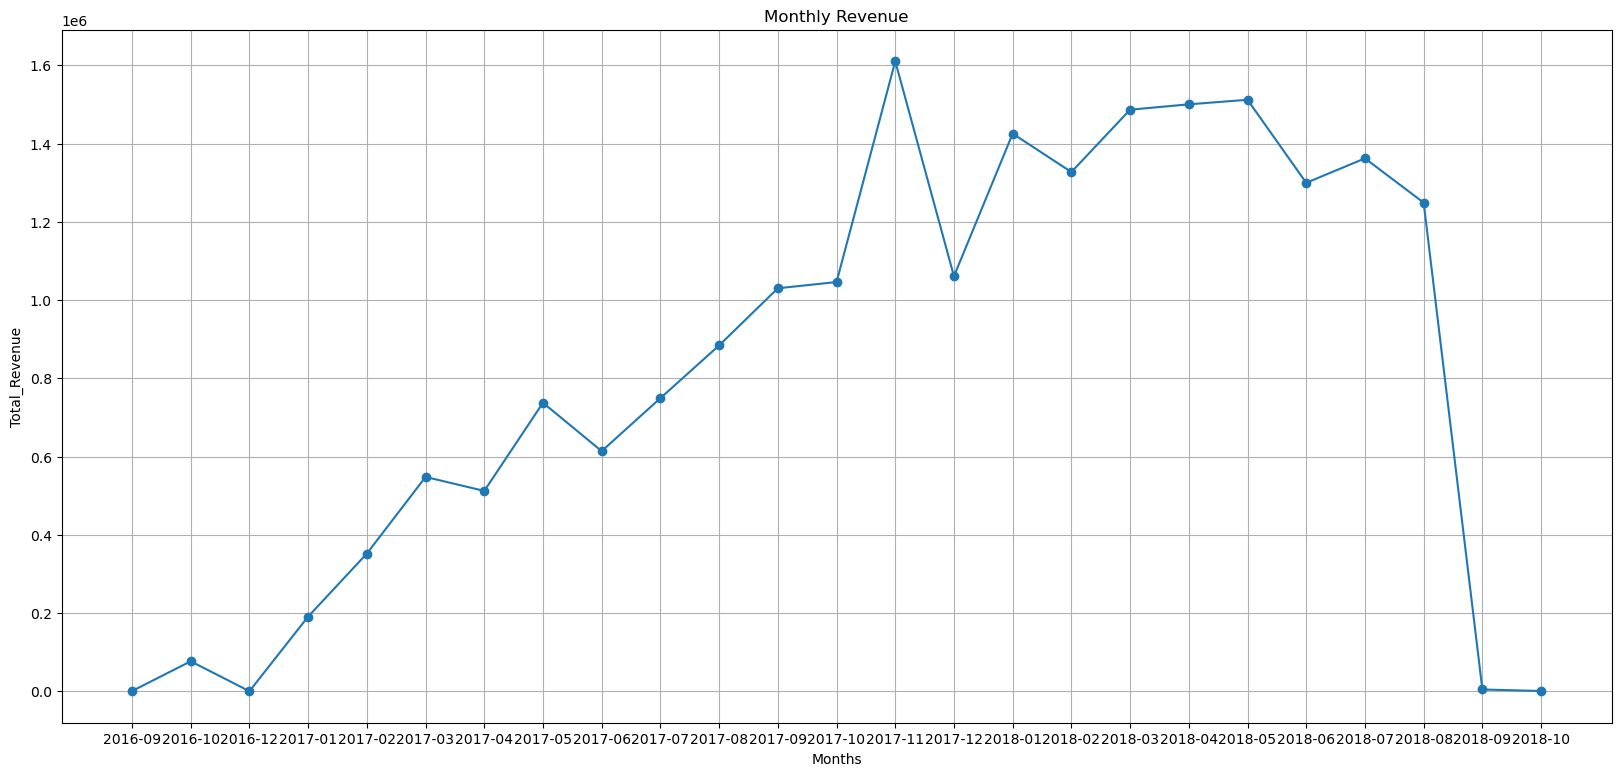

In [3]:
df = dfs["customer_order_payments"]
# Step 1: Convert the date column to datetime
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])

# Step 2: Create Month column
df["year_month"] = df["order_purchase_timestamp"].dt.to_period("M").astype(str)

# Step 3: Calculate monthly revenue
monthly_revenue = df.groupby("year_month")["payment_value"].sum().reset_index()

print(monthly_revenue)

plt.figure(figsize = (20,9))
plt.plot(monthly_revenue["year_month"], monthly_revenue["payment_value"], marker = 'o')
plt.xlabel("Months")
plt.ylabel("Total_Revenue")
plt.title("Monthly Revenue")
plt.grid(True)
plt.show()
           

# Calculate Monthly Category Revenue

In [7]:
df = dfs["customer_order_payments"]
category_monthly = df.groupby(
    ["year_month", "product_category_name_english"]
)["payment_value"].sum().reset_index()

category_monthly

,year_month,product_category_name_english,payment_value
0,2016-09,furniture_decor,272.46
1,2016-09,health_beauty,0.00
2,2016-09,telephony,75.06
3,2016-10,air_conditioning,4675.43
4,2016-10,audio,183.03
...,...,...,...
1248,2018-08,stationery,20666.86
1249,2018-08,telephony,68240.47
1250,2018-08,toys,27884.78
1251,2018-08,watches_gifts,85215.66


# Monthly Revenue by Top 5 Category 

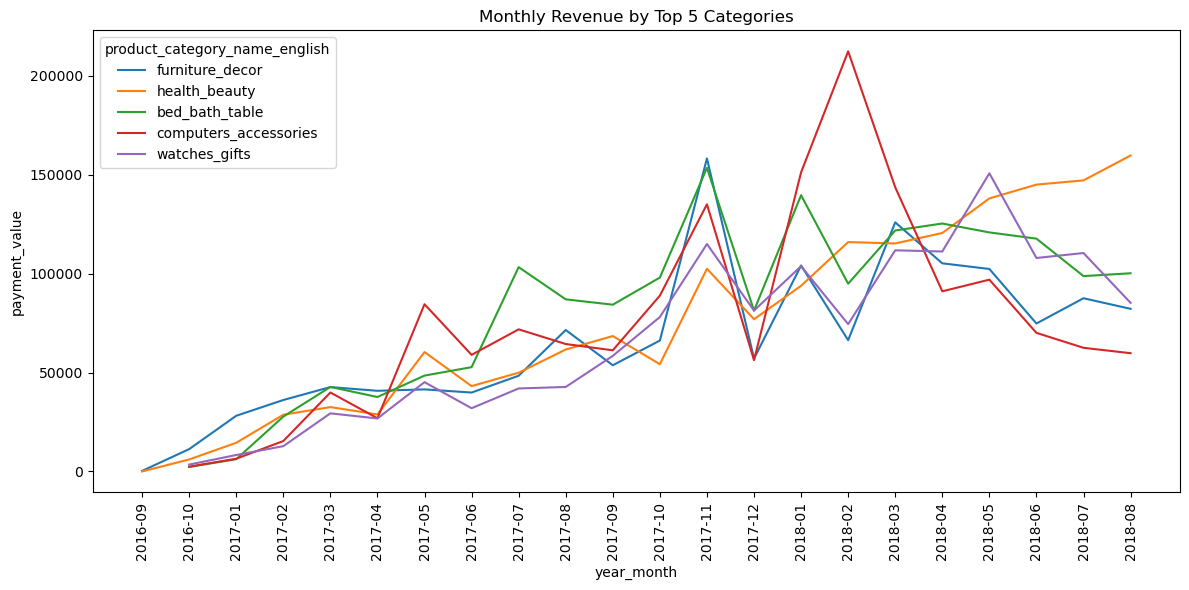

In [76]:
df = dfs["customer_order_payments"]
top = category_monthly.groupby("product_category_name_english")["payment_value"].sum().nlargest(5).index
filtered = category_monthly[category_monthly["product_category_name_english"].isin(top)]

plt.figure(figsize = (12,6))
sns.lineplot(data = filtered, x = "year_month", y = "payment_value", hue = "product_category_name_english" )
plt.xticks(rotation = 90)
plt.title("Monthly Revenue by Top 5 Categories")
plt.tight_layout()
plt.show()


# What is Seller Monthly revenue?

In [10]:
df = dfs["customer_order_payments"]
seller_monthly = df.groupby(
    ["year_month", "seller_id"]
)["payment_value"].sum().reset_index()

seller_monthly

,year_month,seller_id,payment_value
0,2016-09,1554a68530182680ad5c8b042c3ab563,272.46
1,2016-09,a425f92c199eb576938df686728acd20,75.06
2,2016-09,ecccfa2bb93b34a3bf033cc5d1dcdc69,0.00
3,2016-10,011b0eaba87386a2ae96a7d32bb531d1,258.32
4,2016-10,01cf7e3d21494c41fb86034f2e714fa1,89.16
...,...,...,...
16436,2018-08,ffa6adafb71b807dc13159e26431354c,617.59
16437,2018-08,ffc470761de7d0232558ba5e786e57b7,436.01
16438,2018-08,ffdd9f82b9a447f6f8d4b91554cc7dd3,111.79
16439,2018-08,fffd5413c0700ac820c7069d66d98c89,624.33


# What Changes made Year by Yrar Revenue?

In [83]:
df = dfs["customer_order_payments"]
df["year"] = pd.to_datetime(df["order_purchase_timestamp"]).dt.year
yearly_revenue = df.groupby("year")["payment_value"].sum().reset_index()

yearly_revenue["yoy_change"] = yearly_revenue["payment_value"].pct_change() * 100

yearly_revenue["yoy_change"] = yearly_revenue["yoy_change"].fillna(0)

yearly_revenue

,year,payment_value,yoy_change
0,2016,76967.14,0.000000
1,2017,9334784.68,12028.272767
2,2018,11167682.67,19.635139


# Find top most sold products?

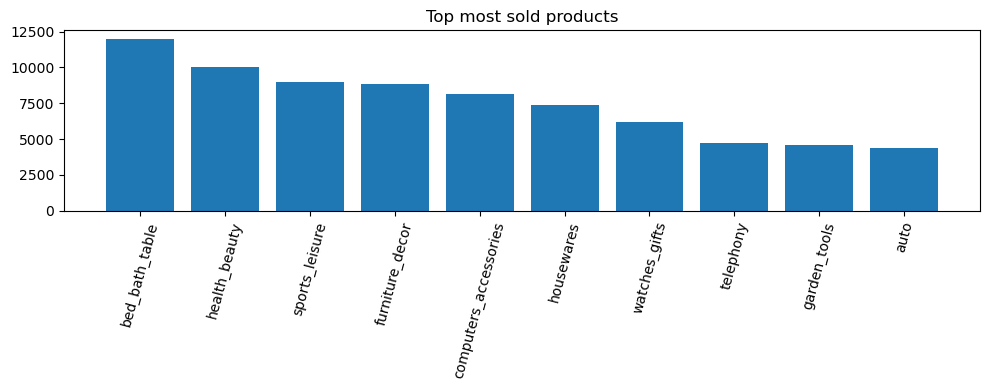

In [58]:
df = dfs["customer_order_payments"]
product_sales = df["product_category_name_english"].value_counts().reset_index()
product_sales.columns = ["product_category_name_english", "total_sold"]
top_product = product_sales.head(10)

plt.figure(figsize = (10,4))
plt.bar(top_product["product_category_name_english"], top_product["total_sold"])
plt.xticks(rotation = 75)
plt.title("Top most sold products")
plt.tight_layout()
plt.show()


# Find top 10 sellers?

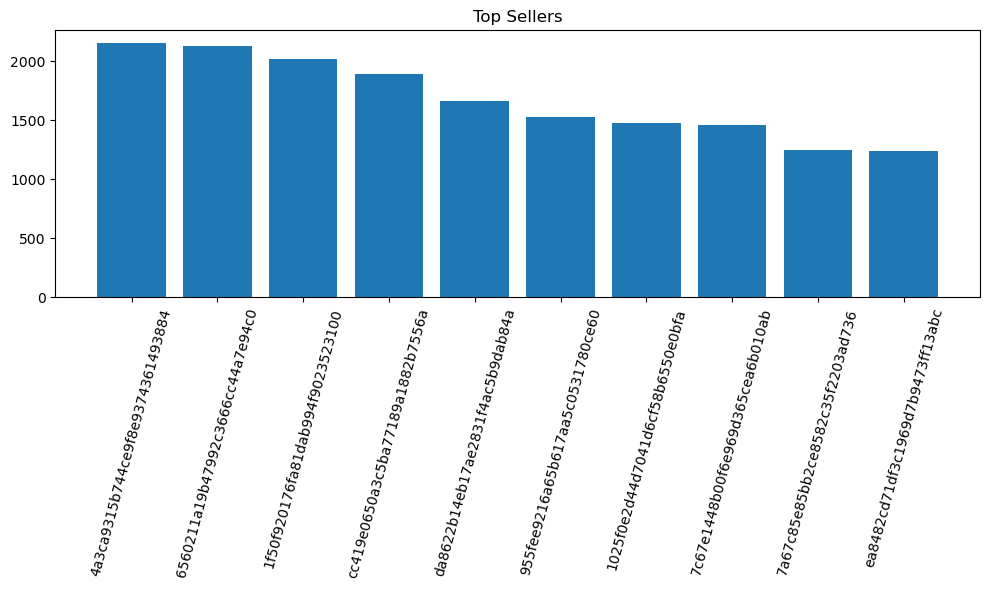

In [63]:
df = dfs["customer_order_payments"]
best_sellers = df["seller_id"].value_counts().reset_index()
best_sellers.columns = ["seller_id", "total_seller"]
top_seller = best_sellers.head(10)  

plt.figure(figsize = (10,6))
plt.bar(top_seller["seller_id"], top_seller["total_seller"])
plt.xticks(rotation = 75)
plt.title("Top Sellers")
plt.tight_layout()
plt.show()

# Find Different payment types ?

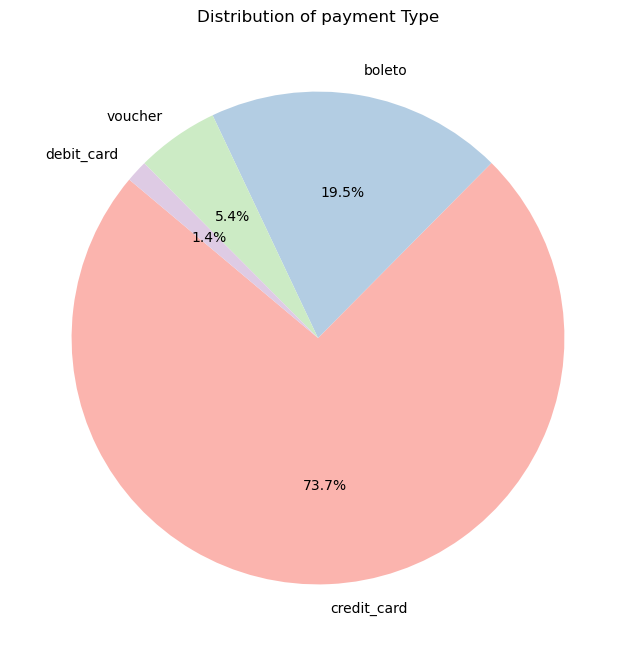

In [66]:
df = dfs["customer_order_payments"]
payment_count = df["payment_type"].value_counts()

plt.figure(figsize = (8,8))
plt.pie(payment_count.values, labels = payment_count.index, autopct = "%1.1f%%", startangle = 140,
        colors = plt.cm.Pastel1.colors)
plt.title("Distribution of payment Type")
plt.show()

# Find Customers who ordered most?

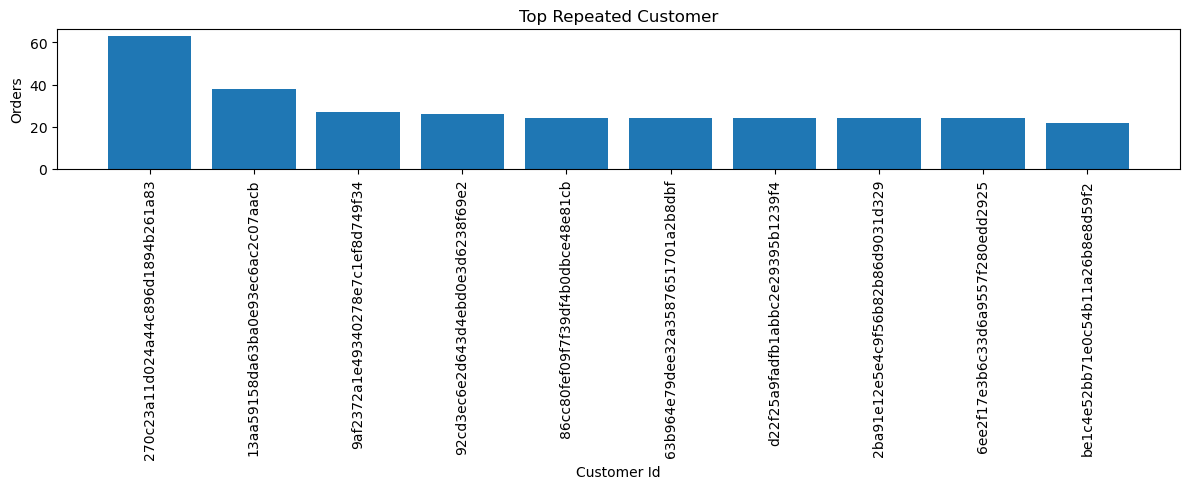

In [5]:
df = dfs["customer_order_payments"]
customer_count = df["customer_id"].value_counts().reset_index()
customer_count.columns = ["customer_id", "order_count"]
top_customers = customer_count.head(10)
#BAR plot
plt.figure(figsize = (12,5))
plt.bar(top_customers["customer_id"].astype(str), top_customers["order_count"])
plt.xticks(rotation = 90)
plt.xlabel("Customer Id")
plt.ylabel("Orders")
plt.title("Top Repeated Customer")
plt.tight_layout()
plt.show()

##### city_state_count.head(5)

# Highest number of order from which city and state?

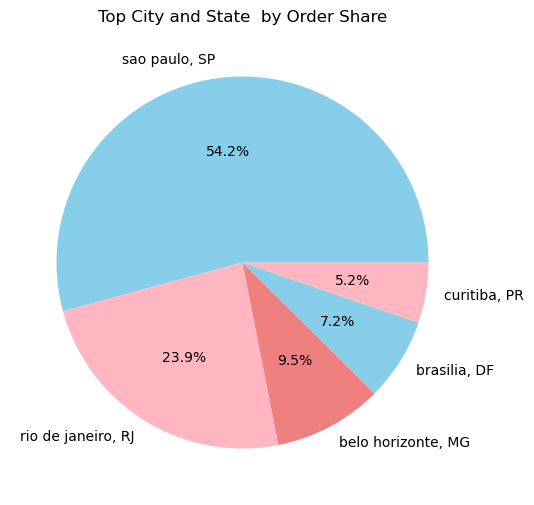

In [71]:
df = dfs["customer_order_payments"]
df["city_state"] = df["customer_city"]+ ", "+df["customer_state"]
city_state_count = df["city_state"].value_counts().reset_index()
city_state_count.columns = ["city_state", "total_orders"]
top_city_state = city_state_count.head(5)

# PIE Plot
plt.figure(figsize = (6,8))
plt.pie(top_city_state["total_orders"], labels = top_city_state["city_state"], autopct = "%1.1f%%",
        colors = ["skyblue", "lightpink", "lightcoral"])
plt.title("Top City and State  by Order Share")
plt.show()

# How many orders with highest Delivery Time?


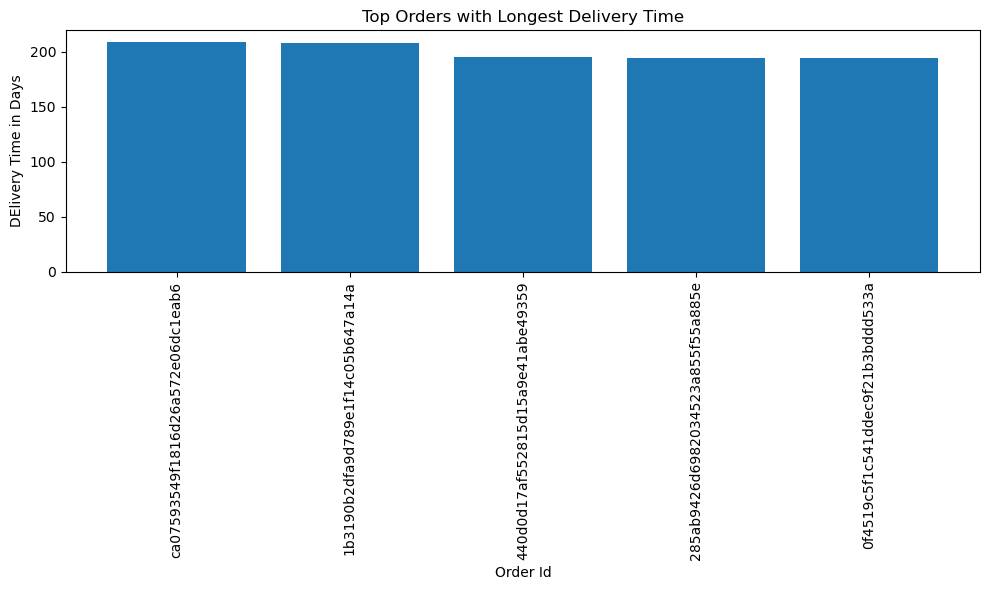

In [74]:
df = dfs["customer_order_payments"]

# Convert to datetime
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])

# Calculate estimated delivery time in days
df["delivery_days"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"]).dt.days

# Get top 5 longest deliveries
top_delayed = df.sort_values("delivery_days", ascending = False).head(5)

#BAR Plot
plt.figure(figsize = (10,6))
plt.bar(top_delayed["order_id"].astype(str), top_delayed["delivery_days"])
plt.xlabel("Order Id")
plt.ylabel("DElivery Time in Days")
plt.title("Top Orders with Longest Delivery Time")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

# How many Oreders with Best Review Scores?

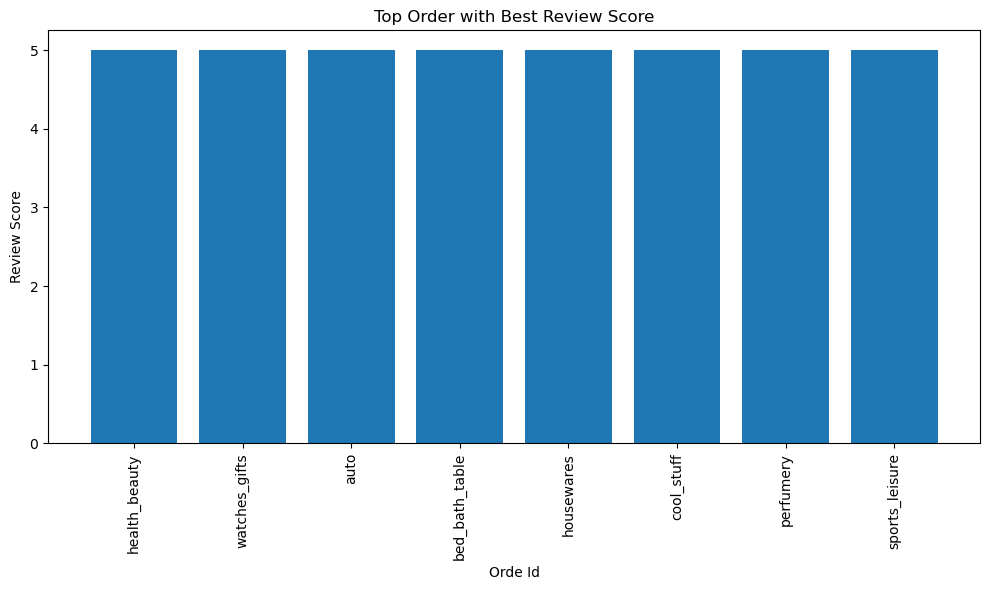

In [76]:
df = dfs["customer_order_payments"]
top_reviews = df.sort_values("review_score", ascending = False).head(10)

# BAR Plot
plt.figure(figsize = (10,6))
plt.bar(top_reviews["product_category_name_english"].astype(str), top_reviews["review_score"])
plt.xlabel("Orde Id")
plt.ylabel("Review Score")
plt.title("Top Order with Best Review Score")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [24]:
top_reviews.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,...,review_creation_date,product_category_name_pt,product_weight_g,seller_zip_code_prefix,seller_city,seller_state,product_category_name_original,product_category_name_english,city_state,delivery_days
10,b7467e21ccbe2f30a3d2e992eaf6a6e1,fa9986e67d08ebc23479b10da8edb977,18276,tatui,SP,52076105d0ca4133091c2c1db1d4bb9c,delivered,2018-05-02 11:12:39,2018-05-09 21:58:31,boleto,...,2018-05-10 00:00:00,beleza_saude,1110.0,13800.0,mogi mirim,SP,beleza_saude,health_beauty,"tatui, SP",7.0
119130,6cb6c3977a3d51c6ae2bac379e4aab7a,2433dc8be3fac1e8a903e77b2bbc4ba4,23587,rio de janeiro,RJ,52008998ed11bdd670e60f49dd40935c,delivered,2017-09-25 20:39:30,2017-10-02 18:12:42,credit_card,...,2017-10-03 00:00:00,relogios_presentes,4338.0,14840.0,guariba,SP,relogios_presentes,watches_gifts,"rio de janeiro, RJ",6.0
119129,bd79d02f82a67aa2b7ae5f0cecf756c7,dd0052c2f78f985c6f83ea615da1c417,37410,tres coracoes,MG,5200457b47c6543e5756c85ab87b4f2f,delivered,2018-04-23 13:47:32,2018-05-02 13:51:22,credit_card,...,2018-05-03 00:00:00,automotivo,1650.0,83823.0,fazenda rio grande,PR,automotivo,auto,"tres coracoes, MG",9.0
119121,38db66ceeb2f79538b16c2add29879ee,4f4816c14a2f023355f36b4f1433a914,2802,sao paulo,SP,51fbc7ecec17e2dbcd5c495410af77ca,delivered,2018-07-21 19:34:46,2018-07-25 18:08:59,voucher,...,2018-07-31 00:00:00,cama_mesa_banho,650.0,9111.0,santo andre,SP,cama_mesa_banho,bed_bath_table,"sao paulo, SP",3.0
119123,a683fb2ddea3effab4756e02e2f0468e,92970e5a0e375aceb871dd8494d2932e,18114,votorantim,SP,51fdc51568710c421372d93f12c21ab6,delivered,2017-09-12 20:36:17,2017-09-21 20:51:47,credit_card,...,2017-09-22 00:00:00,cama_mesa_banho,300.0,14940.0,ibitinga,SP,cama_mesa_banho,bed_bath_table,"votorantim, SP",9.0


In [28]:
highest_freight.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,...,review_creation_date,product_category_name_pt,product_weight_g,seller_zip_code_prefix,seller_city,seller_state,product_category_name_original,product_category_name_english,city_state,delivery_days
39174,4eed76c1aafeceac4250e202ca9b1a5a,97734fdca127fddcb5f92f841690c3f2,64770,sao raimundo nonato,PI,a77e1550db865202c56b19ddc6dc4d53,delivered,2018-04-16 14:57:21,2018-04-27 19:45:00,credit_card,...,2018-04-28 00:00:00,bebes,14675.0,86804.0,apucarana,PR,bebes,baby,"sao raimundo nonato, PI",11.0
110567,f2c743697f9b2ff2902df23a16582d80,5e92460d739e8dd987e279285a1d278c,88053,florianopolis,SC,3fde74c28a3d5d618c00f26d51baafa0,delivered,2018-08-13 14:07:50,2018-08-24 00:14:39,boleto,...,2018-08-25 00:00:00,utilidades_domesticas,30000.0,18030.0,sorocaba,SP,utilidades_domesticas,housewares,"florianopolis, SC",10.0
84563,f08306b95370e8d5f0d97b71229284b6,f140f377d666848e3712b51a2734d120,87013,maringa,PR,076d1555fb53a89b0ef4d529e527a0f6,delivered,2018-07-30 10:04:21,2018-08-08 00:46:43,boleto,...,2018-08-08 00:00:00,utilidades_domesticas,30000.0,18030.0,sorocaba,SP,utilidades_domesticas,housewares,"maringa, PR",8.0
35319,98ef9188ce9357bd77f60150a935c7fb,c6f70f6262d971489361b0d4fb0936ed,12460,campos do jordao,SP,9f49bd16053df810384e793386312674,delivered,2018-07-29 11:41:33,2018-08-06 20:07:34,boleto,...,2018-08-07 00:00:00,utilidades_domesticas,25250.0,88075.0,sao jose,SC,utilidades_domesticas,housewares,"campos do jordao, SP",8.0
98634,9913942a9bd26b840c4d19db0cbf6b89,5f2f6fba74de007241fedfc485b72ba7,78500,colider,MT,264a7e199467906c0727394df82d1a6a,delivered,2018-04-06 17:20:33,2018-05-08 13:12:16,credit_card,...,2018-05-09 00:00:00,beleza_saude,30000.0,3908.0,sao paulo,SP,beleza_saude,health_beauty,"colider, MT",31.0


# Find Orders with higest Freight Value?

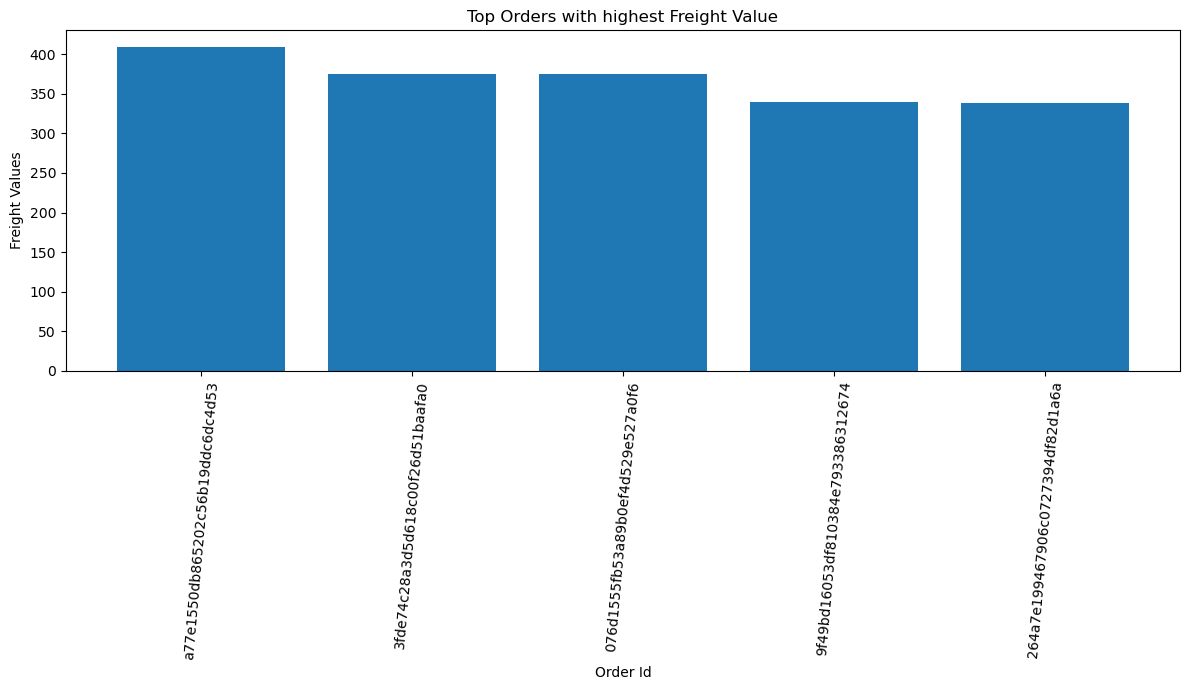

In [79]:
df = dfs["customer_order_payments"]           
highest_freight = df.sort_values("freight_value", ascending = False).head(5)

# Bar plot
plt.figure(figsize = (12,7))
plt.bar(highest_freight["order_id"].astype(str), highest_freight["freight_value"])
plt.xlabel("Order Id")
plt.ylabel("Freight Values")
plt.title("Top Orders with highest Freight Value")
plt.xticks(rotation = 85)
plt.tight_layout()
plt.show()

# Find the Order Status?

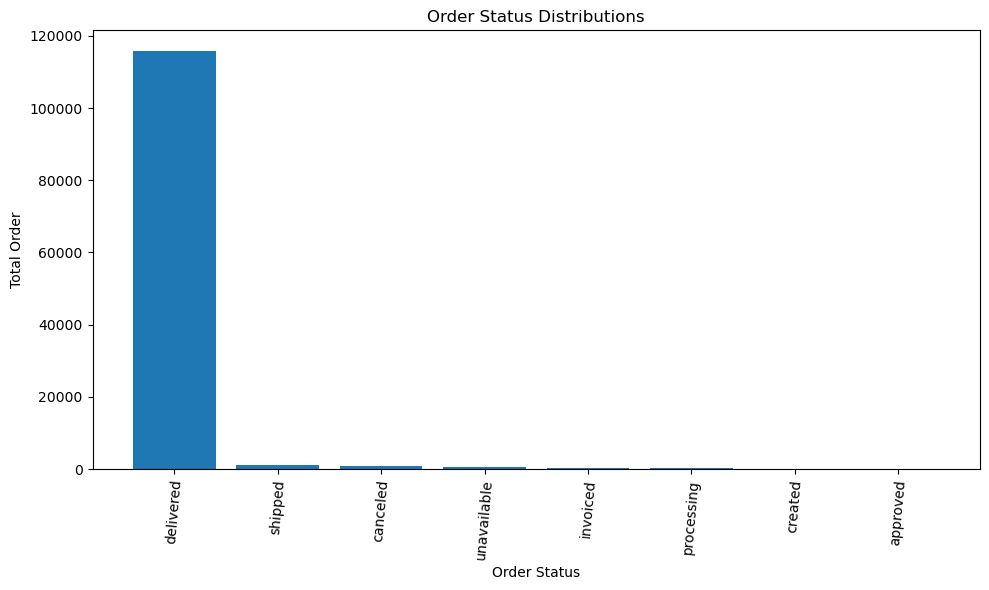

In [4]:
df = dfs["customer_order_payments"]           
order_status_count = df["order_status"].value_counts()
order_status_count = order_status_count.reset_index()
order_status_count.columns = ["order_status", "total_orders"]
status = order_status_count.head(10)

# PIE Plot
plt.figure(figsize = (10,6))
plt.bar(order_status_count["order_status"], order_status_count["total_orders"])
plt.xlabel("Order Status")
plt.ylabel("Total Order")
plt.title("Order Status Distributions")
plt.xticks(rotation = 85)
plt.tight_layout()
plt.show()

# How to calculate Product Weight vs Freight Value? 

R:\AnacondaConfigs\AppData\Local\Temp\ipykernel_38316\3304845264.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["weight_divider"] = df["product_weight_g"].apply(


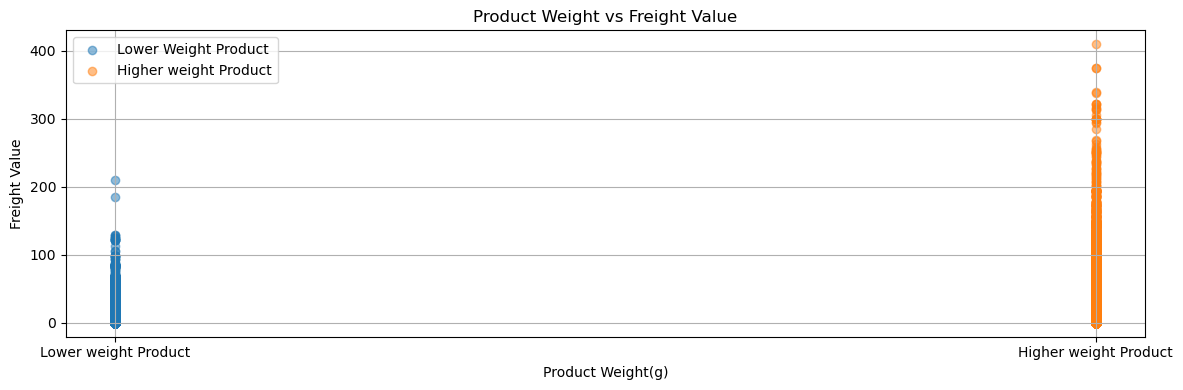

In [82]:
df = dfs["customer_order_payments"]
df = df.dropna(subset = ["product_weight_g", "freight_value"])

x = df["product_weight_g"]
y = df["freight_value"]
# Create 2 groups for 2 colors 
df["weight_divider"] = df["product_weight_g"].apply(
lambda x: "Lower weight Product" if x <= df["product_weight_g"].median() else "Higher weight Product"
)

weight_divider = df["product_weight_g"].median()

# Filter 2 groups
group1 = df[df["product_weight_g"] <= weight_divider] # Blue
group2 = df[df["product_weight_g"] > weight_divider] # Red
# SCATTER Plot
plt.figure(figsize = (12,4))
plt.scatter(group1["weight_divider"], group1["freight_value"], 
            alpha = 0.5,  label = "Lower Weight Product")
plt.scatter(group2["weight_divider"], group2["freight_value"], 
            alpha = 0.5, label = "Higher weight Product")

# This is exactly where your vertical line goes
#plt.axvline(weight_divider, color = "black", linestyle = "--", linewridth = 1)

plt.xlabel("Product Weight(g)")
plt.ylabel("Freight Value")
plt.title("Product Weight vs Freight Value")
plt.grid(True)

plt.legend()
plt.tight_layout()
plt.show()

# Find Best Sellers vs Best Proudects?

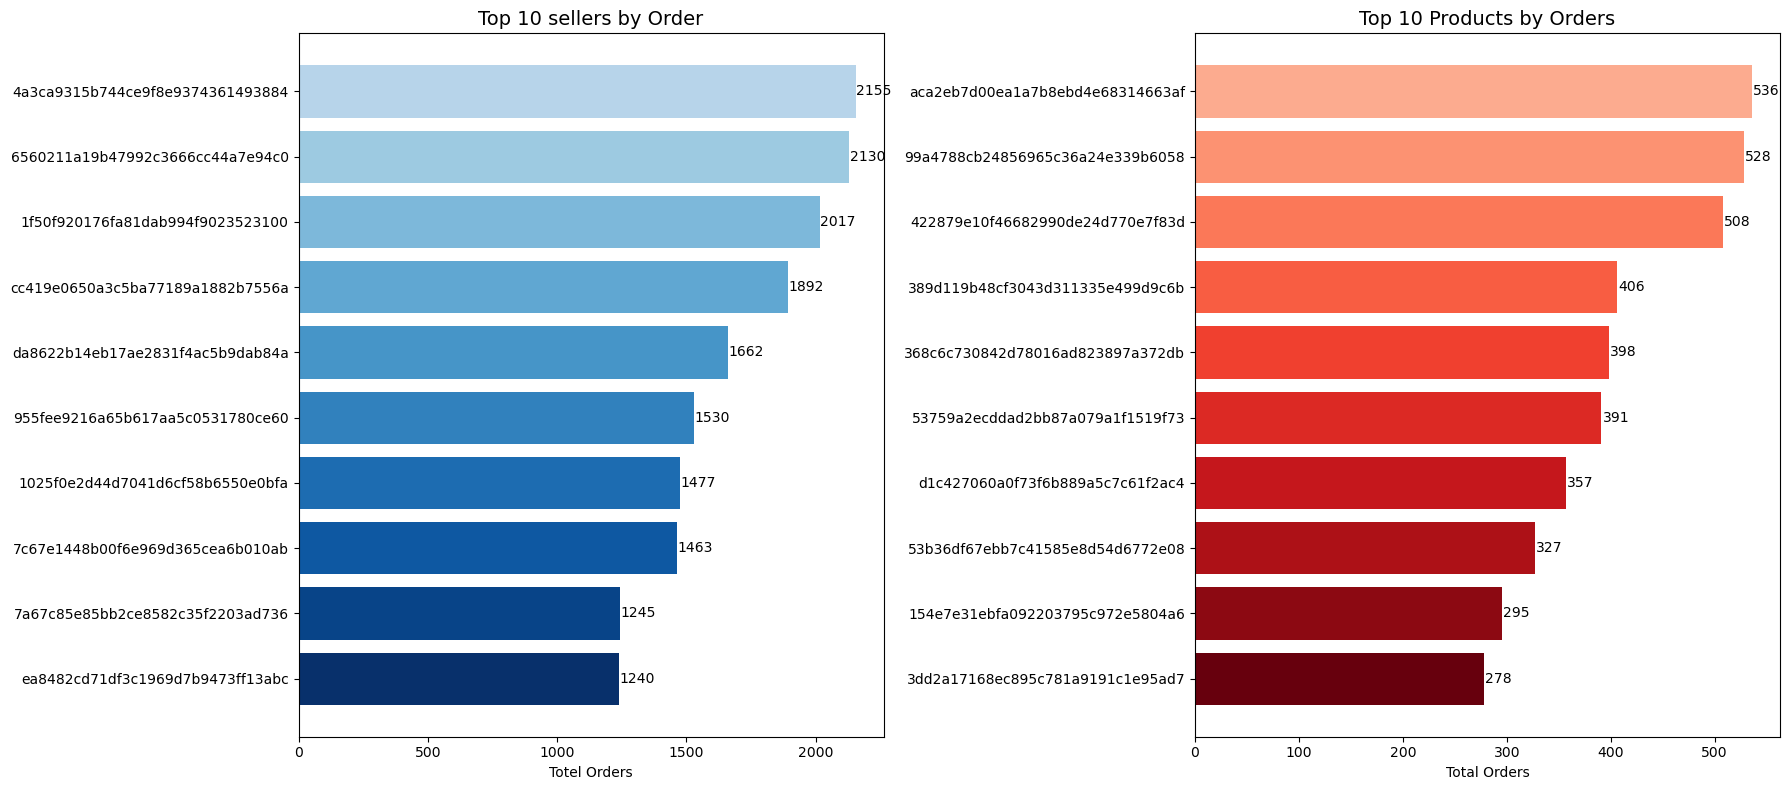

In [56]:
df = dfs["customer_order_payments"]

# TOP 10 SELLERS
top_seller = (df["seller_id"].value_counts().head(10).reset_index())
top_seller.columns = ["seller_id", "total_orders"]
top_seller = top_seller.head(10)

# TOP 10 PRODUCTS
top_product = (df["product_id"].value_counts().head(10).reset_index())
top_product.columns = ["product_id", "total_orders"]
top_product = top_product.head(10)

# PLOTTING SIDE-BY-SIDE
fig, axis = plt.subplots(1, 2, figsize=(18,8))

# LEFT PLOT: Sellers
colors1 = plt.cm.Blues(np.linspace(0.3, 1, 10))
axis[0].barh(top_seller["seller_id"], top_seller["total_orders"], color = colors1)
axis[0].invert_yaxis()
axis[0].set_title("Top 10 sellers by Order", fontsize = 14)
axis[0].set_xlabel("Totel Orders")

for i, values in enumerate(top_seller["total_orders"]):
    axis[0].text(values + 1, i, str(values), va = "center")


# RIGHT PLOT: Products
colors2 = plt.cm.Reds(np.linspace(0.3, 1, 10))
axis[1].barh(top_product["product_id"], top_product["total_orders"], color = colors2)
axis[1].invert_yaxis()
axis[1].set_title("Top 10 Products by Orders", fontsize = 14)
axis[1].set_xlabel("Total Orders")

for i, values in enumerate(top_product["total_orders"]):
    axis[1].text(values + 1, i, str(values), va = "center")

plt.tight_layout()
plt.show()

In [38]:
dfs["customer_order_payments"].columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_delivered_customer_date',
       'payment_type', 'payment_installments', 'payment_value',
       'order_item_id', 'product_id', 'seller_id', 'price', 'freight_value',
       'review_id', 'review_score', 'review_creation_date',
       'product_category_name_pt', 'product_weight_g',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name_original', 'product_category_name_english',
       'delivery_days'],
      dtype='object')

# Detect Outliers using IQR(Inter Quantile Range)?

payment_value: 9638 outliers 


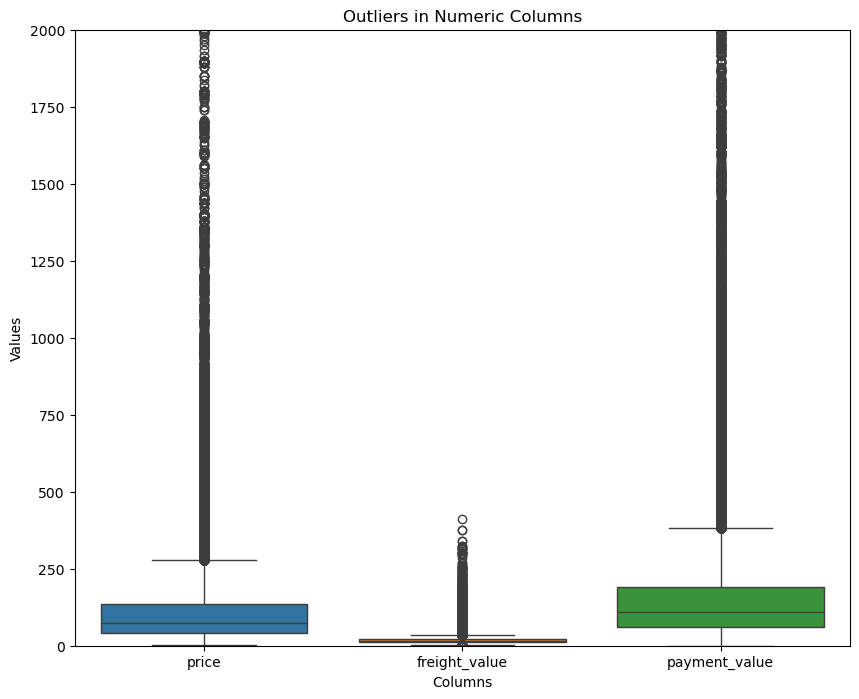

In [85]:
numeric_cols = ["price", "freight_value", "payment_value"]

outliers = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    #outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]


# show number of outliers per column

print(f"{col}: {len(outliers[col])} outliers ")

# BOX Plot
plt.figure(figsize = (10,8))
sns.boxplot(data = df[numeric_cols])

plt.ylim(0, 2000)
plt.title("Outliers in Numeric Columns")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()

# What is Average Revenue per Order?

In [60]:
avg_rev_per_order = df.groupby("order_id")["payment_value"].sum().mean()
avg_rev_per_order

np.float64(206.95744574508737)

# Find the Most Expensive Product Overall?

In [5]:
df = dfs["customer_order_payments"]
most_expencive = df.loc[df["price"].idxmax()]
most_expencive = df["price"].value_counts().reset_index()
most_expencive.columns = ["price", "totla_product"]

# BAR Plot
plt.figure(figsize= (10,8))
plt.bar(most_expencive["price"], most_expencive["totla_product"])
plt.xlabel("Price od Product")
plt.ylabel("Total Product")
plt.title("Most Expencive Product")
plt.xticks(rotation = 85)
plt.show()

customer_id                       c6e2731c5b391845f6800c97401a43a9
customer_unique_id                dc4802a71eae9be1dd28f5d788ceb526
customer_zip_code_prefix                                     79042
customer_city                                         campo grande
customer_state                                                  MS
order_id                          0812eb902a67711a1cb742b3cdaa65ae
order_status                                             delivered
order_purchase_timestamp                       2017-02-12 20:37:36
order_delivered_customer_date                  2017-03-03 14:23:18
payment_type                                           credit_card
payment_installments                                           8.0
payment_value                                              6929.31
order_item_id                                                  1.0
product_id                        489ae2aa008f021502940f251d4cce7f
seller_id                         e3b4998c7a498169dc7bce44e6bb

# Find top most Highest Price of Products?

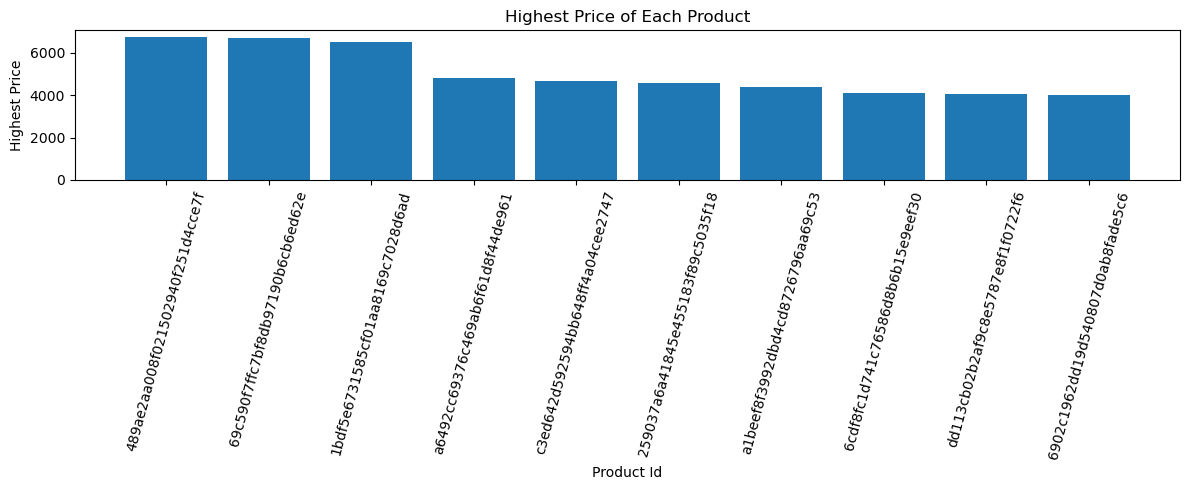

In [51]:
df = dfs["customer_order_payments"]

highest_price = df.groupby("product_id")["price"].max().reset_index()
highest_price = highest_price.sort_values(by ="price", ascending = False)
top_n = highest_price.head(10)

# BAR Plot
plt.figure(figsize = (12,5))
plt.bar(top_n["product_id"], top_n["price"])
plt.xlabel("Product Id")
plt.ylabel("Highest Price")
plt.title("Highest Price of Each Product")
plt.xticks(rotation = 75)
plt.tight_layout()
plt.show()

# Find Orders with Longest Devivery Times?

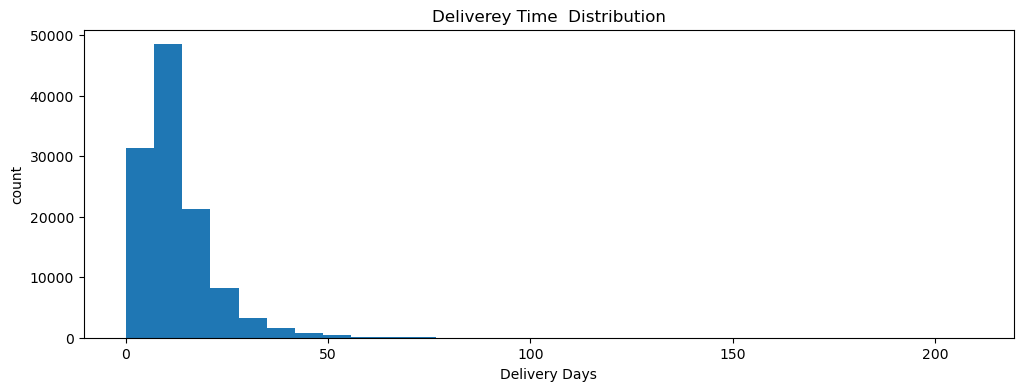

In [40]:
df = dfs["customer_order_payments"]

df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])

df["delivery_days"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"] ).dt.days
df["delivery_days"].describe()


# HISTOGRAM Plot
plt.figure(figsize = (12,4))
plt.hist(df["delivery_days"], bins = 30)
plt.xlabel("Delivery Days")
plt.ylabel("count")
plt.title("Deliverey Time  Distribution")
plt.show()

In [18]:
df["delivery_days"].describe()


count    115718.000000
mean         12.022633
std           9.455076
min           0.000000
25%           6.000000
50%          10.000000
75%          15.000000
max         209.000000
Name: delivery_days, dtype: float64

# Total number of Customers

In [31]:
df = dfs["customer_order_payments"]
df["customer_id"].nunique()


99438

In [34]:
df = dfs["customer_order_payments"]
df["order_id"].nunique()


99438

# Totla Number of Products

In [30]:
df = dfs["customer_order_payments"]
df["product_id"].nunique()

32951

# How Many Products sold?

In [35]:
df = dfs["customer_order_payments"]
total_product_sold = len(df)
print ("Number of Product Sold:",total_product_sold)

Number of Product Sold: 119131


# How many Product sold by Categories?

In [38]:
category_sales = df.groupby("product_category_name_english")["product_id"].count().sort_values(ascending = False)

category_sales.head(10)

product_category_name_english
bed_bath_table           11988
health_beauty            10032
sports_leisure            9003
furniture_decor           8832
computers_accessories     8150
housewares                7380
watches_gifts             6213
telephony                 4726
garden_tools              4588
auto                      4400
Name: product_id, dtype: int64

In [43]:
df = dfs["customer_order_payments"]
df["seller_id"].nunique()

3095

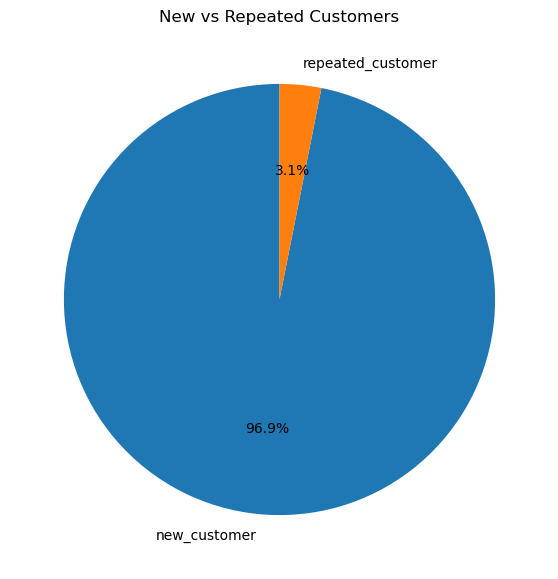

In [5]:
df = dfs["customer_order_payments"]

# Count orders per customer
order_counts = df.groupby("customer_unique_id")["order_id"].nunique()

# New = 1 order
new_customer = (order_counts == 1).sum()
# Repeated = >1 orders
repeated_customer = (order_counts > 1).sum()

new_customer, repeated_customer

# Create a ratio_df DataFram for ploting 
ratio_df = pd.DataFrame({
    "type": ["new_customer", "repeated_customer"],
    "count": [new_customer, repeated_customer]
})

# PIE Plot
plt.figure(figsize = (7,7))
plt.pie(ratio_df["count"], labels = ratio_df["type"], autopct = "%1.1f%%", startangle = 90)
plt.title("New vs Repeated Customers")
plt.show()